# Assignment:

Challenge - Time Series Analysis

Using a different time series data set (either from FRED or elsewhere, go about the process of time series modeling. 
Specifically generate the following things:

    Plot the time series, along with any logical or necessary differences to get a stationary dataset
    Generate and interpret a PACF for the time series (and/or its differences)
    Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
    Finally choose one specification and make the case for that as a logical model for your dataset.

This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

# Data Choice:

## Data: 
Consumer Price Index for All Urban Consumers: All Items, Monthly, Seasonally Adjusted for the years 1947 to 2019

## Source: 
Bureau of Labor Statistics (by way of FRED)


## Description: 
The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a measure of the average monthly change in the price for goods and services paid by urban consumers between any two time periods. It can also represent the buying habits of urban consumers. This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, self-employed, short-term workers, unemployed, retirees, and those not in the labor force. 

The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from about 4,000 housing units and approximately 26,000 retail establishments across 87 urban areas. To calculate the index, price changes are averaged with weights representing their importance in the spending of the particular group. The index measures price changes (as a percent change) from a predetermined reference date. In addition to the original unadjusted index distributed, the Bureau of Labor Statistics also releases a seasonally adjusted index. The unadjusted series reflects all factors that may influence a change in prices. However, it can be very useful to look at the seasonally adjusted CPI, which removes the effects of seasonal changes, such as weather, school year, production cycles, and holidays. 

The CPI can be used to recognize periods of inflation and deflation. Significant increases in the CPI within a short time frame might indicate a period of inflation, and significant decreases in CPI within a short time frame might indicate a period of deflation. However, because the CPI includes volatile food and oil prices, it might not be a reliable measure of inflationary and deflationary periods. For a more accurate detection, the core CPI (CPILFESL) is often used. When using the CPI, please note that it is not applicable to all consumers and should not be used to determine relative living costs. Additionally, the CPI is a statistical measure vulnerable to sampling error since it is based on a sample of prices and not the complete average. 

## Suggested Citation:
U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items [CPIAUCSL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL, September 9, 2019. 

In [1]:
# Retrieve the toolkits
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from numpy import log
from pmdarima.arima.utils import ndiffs

In [2]:
# Get the data file and take a look
df = pd.read_csv('CPIAUCSL.csv',index_col='DATE')
df.columns = ['CPI']

In [3]:
df.describe()

,CPI
count,871.000000
mean,109.260943
std,77.139899
min,21.480000
25%,31.295000
50%,98.800000
75%,177.350000
max,256.161000


In [4]:
df.head(10)

,CPI
DATE,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95
1947-06-01,22.08
1947-07-01,22.23
1947-08-01,22.40
1947-09-01,22.84


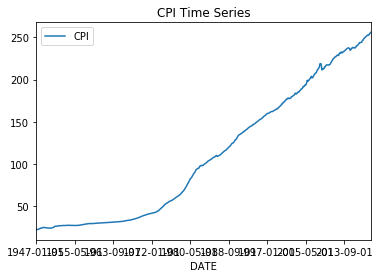

In [5]:
# take a look

df.plot()
plt.title('CPI Time Series')
plt.show()

In [6]:
# Check whether data is stationary
result = adfuller(df.CPI.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 1.991103
p-value: 0.998661


In [7]:
# holy cannoli! -- definitely not stationary -- let's get it going

# Will taking one difference change it?
result = adfuller(df.CPI.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#

ADF Statistic: -3.525207
p-value: 0.007363


In [8]:
#  That's certainly a big change with the p-value now being higher than the significance level
# Let's try a second differencing

result = adfuller(df.CPI.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.858568
p-value: 0.000000


In [9]:
# Based solely on these results, one would lean to one differencing. 
# Let's do some additional investigation on what the differencing parameter (d) should be --

from pmdarima.arima.utils import ndiffs

y = df.CPI

## Adf Test
print(ndiffs(y, test='adf'))  

# KPSS test
print(ndiffs(y, test='kpss'))

# PP test:
print(ndiffs(y, test='pp')) 

1
2
1


In [10]:
# More indication that 1 is the right differencer

# Add some difference features

df['CPI_d1'] = df.CPI - df.CPI.shift()
df['CPI_d2'] = df.CPI_d1 - df.CPI_d1.shift()
df['CPI_d3'] = df.CPI_d2 - df.CPI_d2.shift()


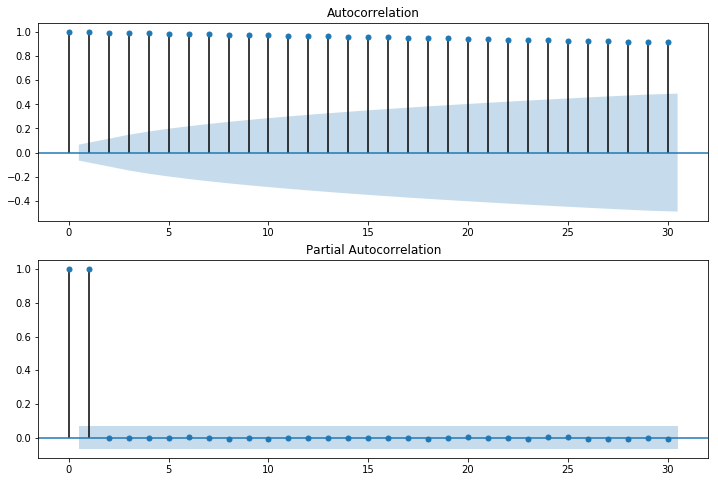

In [11]:
# let’s see how the autocorrelation plots look.

# Start with no difference

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['CPI'], ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['CPI'], ax=ax2)
plt.show()

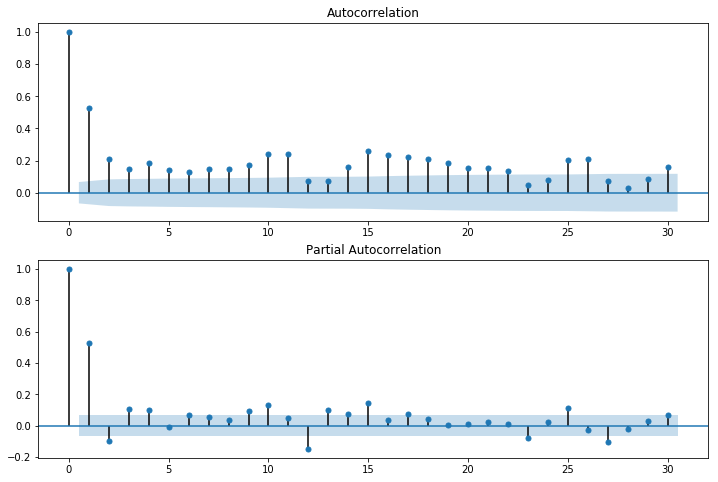

In [12]:
# Only 1 outlier for partial auto correlation implying 1 for AR is a good parameter
# All 30 of the measures for autocorrelation are outliers, so probably need some differencing here

# Now with one difference

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['CPI'].diff().dropna(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['CPI'].diff().dropna(), ax=ax2)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                  870
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -261.185
Method:                       css-mle   S.D. of innovations              0.327
Date:                Mon, 09 Sep 2019   AIC                            530.371
Time:                        19:42:25   BIC                            549.445
Sample:                    02-01-1947   HQIC                           537.669
                         - 07-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2702      0.021     12.624      0.000       0.228       0.312
ar.L1.D.CPI     0.3676      0.058      6.327      0.000       0.254       0.481
ma.L1.D.CPI     0.2235      0.061      3.658    

Text(0.5, 1.0, 'Histogram of Residuals')

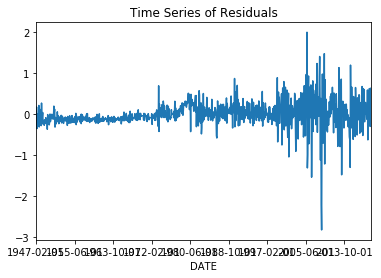

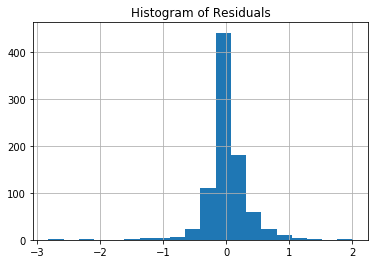

In [13]:
# Much better, now we have one major outlier for autocorreclation and ma parameter of 1
# And, one major outlier for AR
# So we'll give an initial model a go with 1,1,1

model = ARIMA(df.CPI, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.CPI_d1   No. Observations:                  869
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -250.932
Method:                       css-mle   S.D. of innovations              0.323
Date:                Mon, 09 Sep 2019   AIC                            509.863
Time:                        19:42:26   BIC                            528.933
Sample:                    03-01-1947   HQIC                           517.160
                         - 07-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.022      0.307      -0.000       0.001
ar.L1.D.CPI_d1     0.4450      0.032     13.865      0.000       0.382       0.508
ma.L1.D.CPI_d1    -0.9818      0.008

Text(0.5, 1.0, 'Histogram of Residuals')

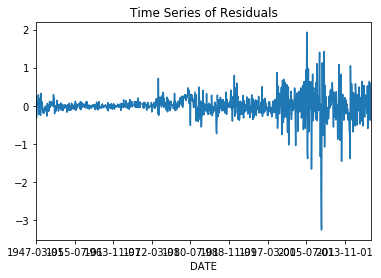

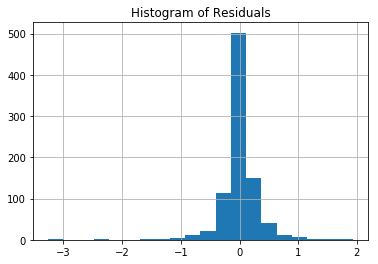

In [14]:
# Not terrible and not great
# all p values are 0 and all less than confidence so that's very good and indicates all are significant
# Let's run the same parameters on the diffs (aka 1,2,1 on orig data)

model = ARIMA(df.CPI_d1.dropna(), order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')


residuals.hist(bins=20)
plt.title('Histogram of Residuals')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                  870
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -261.018
Method:                       css-mle   S.D. of innovations              0.327
Date:                Mon, 09 Sep 2019   AIC                            532.037
Time:                        19:42:26   BIC                            555.879
Sample:                    02-01-1947   HQIC                           541.159
                         - 07-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2702      0.022     12.448      0.000       0.228       0.313
ar.L1.D.CPI     0.2803      0.161      1.736      0.083      -0.036       0.597
ar.L2.D.CPI     0.0529      0.094      0.564    

Text(0.5, 1.0, 'Histogram of Residuals')

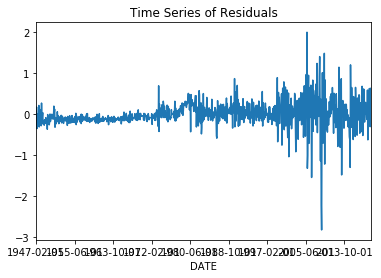

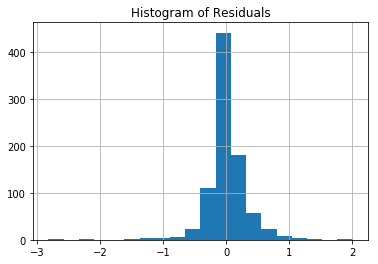

In [15]:
# Let's try other different parameters

model = ARIMA(df.CPI, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')


residuals.hist(bins=20)
plt.title('Histogram of Residuals')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                  870
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -238.951
Method:                       css-mle   S.D. of innovations              0.318
Date:                Mon, 09 Sep 2019   AIC                            489.902
Time:                        19:42:27   BIC                            518.513
Sample:                    02-01-1947   HQIC                           500.850
                         - 07-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2610      0.092      2.838      0.005       0.081       0.441
ar.L1.D.CPI     1.1816      0.067     17.739      0.000       1.051       1.312
ar.L2.D.CPI    -0.1858      0.066     -2.832    

Text(0.5, 1.0, 'Histogram of Residuals')

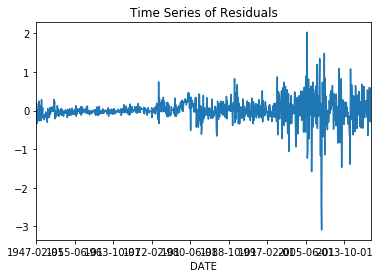

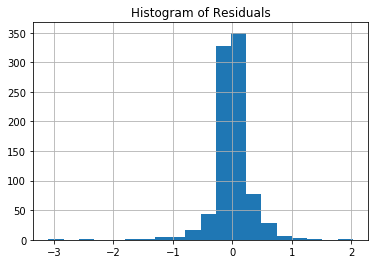

In [16]:
# Let's try other different parameters

model = ARIMA(df.CPI, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')


residuals.hist(bins=20)
plt.title('Histogram of Residuals')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D2.CPI   No. Observations:                  869
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -239.208
Method:                       css-mle   S.D. of innovations              0.318
Date:                Mon, 09 Sep 2019   AIC                            488.417
Time:                        19:42:28   BIC                            512.253
Sample:                    03-01-1947   HQIC                           497.538
                         - 07-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      0.774      0.439      -0.001       0.001
ar.L1.D2.CPI     0.5053      0.035     14.533      0.000       0.437       0.573
ar.L2.D2.CPI    -0.1685      0.035     -4.87

Text(0.5, 1.0, 'Histogram of Residuals')

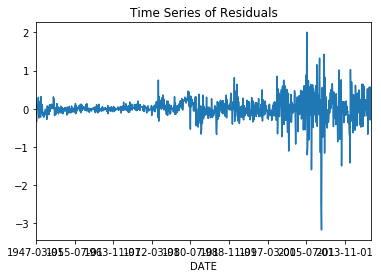

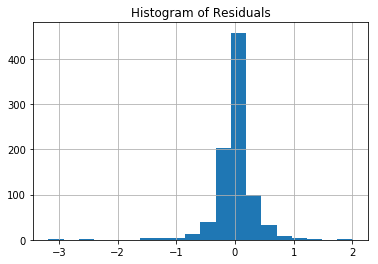

In [17]:
# Let's try other different parameters

model = ARIMA(df.CPI, order=(2,2,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')


residuals.hist(bins=20)
plt.title('Histogram of Residuals')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D2.CPI   No. Observations:                  869
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -238.698
Method:                       css-mle   S.D. of innovations              0.318
Date:                Mon, 09 Sep 2019   AIC                            489.396
Time:                        19:42:29   BIC                            518.000
Sample:                    03-01-1947   HQIC                           500.341
                         - 07-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      0.832      0.406      -0.001       0.001
ar.L1.D2.CPI     0.5141      0.036     14.439      0.000       0.444       0.584
ar.L2.D2.CPI    -0.1841      0.038     -4.86

Text(0.5, 1.0, 'Histogram of Residuals')

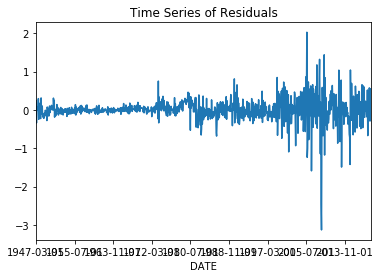

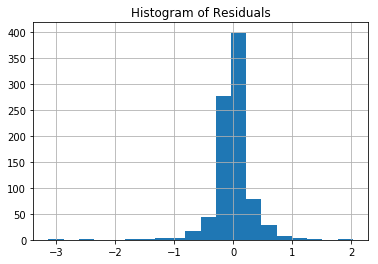

In [18]:
# Let's try other different parameters

model = ARIMA(df.CPI, order=(3,2,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')


residuals.hist(bins=20)
plt.title('Histogram of Residuals')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                  870
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -237.984
Method:                       css-mle   S.D. of innovations              0.318
Date:                Mon, 09 Sep 2019   AIC                            487.968
Time:                        19:42:30   BIC                            516.579
Sample:                    02-01-1947   HQIC                           498.915
                         - 07-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2654      0.085      3.110      0.002       0.098       0.433
ar.L1.D.CPI     1.4925      0.037     40.426      0.000       1.420       1.565
ar.L2.D.CPI    -0.6694      0.056    -11.859    

Text(0.5, 1.0, 'Histogram of Residuals')

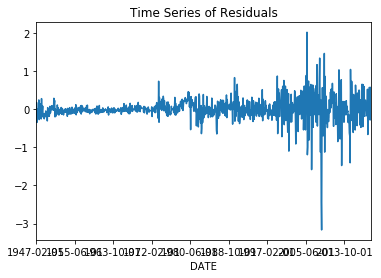

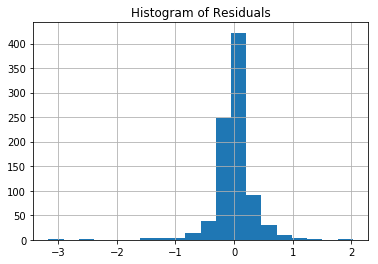

In [19]:

# Let's try other different parameters

model = ARIMA(df.CPI, order=(3,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')


residuals.hist(bins=20)
plt.title('Histogram of Residuals')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D2.CPI   No. Observations:                  869
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -238.551
Method:                       css-mle   S.D. of innovations              0.318
Date:                Mon, 09 Sep 2019   AIC                            491.102
Time:                        19:42:32   BIC                            524.473
Sample:                    03-01-1947   HQIC                           503.871
                         - 07-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      0.858      0.391      -0.000       0.001
ar.L1.D2.CPI     0.7477      0.419      1.786      0.074      -0.073       1.568
ar.L2.D2.CPI    -0.3034      0.214     -1.42

Text(0.5, 1.0, 'Histogram of Residuals')

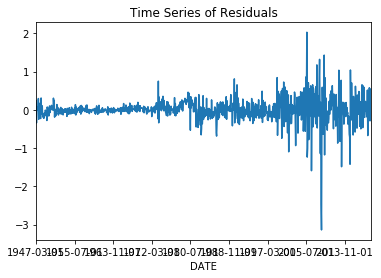

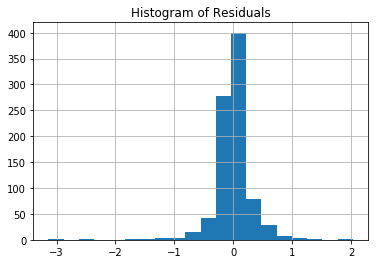

In [20]:
# Let's try other different parameters

model = ARIMA(df.CPI, order=(3,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')


residuals.hist(bins=20)
plt.title('Histogram of Residuals')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                  870
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -237.752
Method:                       css-mle   S.D. of innovations              0.318
Date:                Mon, 09 Sep 2019   AIC                            489.504
Time:                        19:42:33   BIC                            522.884
Sample:                    02-01-1947   HQIC                           502.276
                         - 07-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2644      0.087      3.034      0.002       0.094       0.435
ar.L1.D.CPI     1.3889      0.152      9.114      0.000       1.090       1.688
ar.L2.D.CPI    -0.5198      0.224     -2.324    

Text(0.5, 1.0, 'Histogram of Residuals')

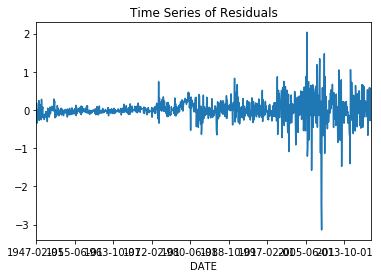

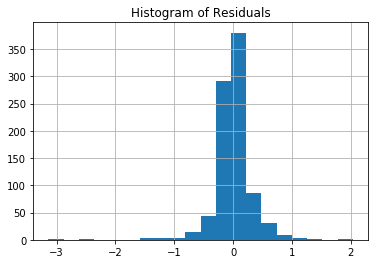

In [21]:
# Let's try other different parameters

model = ARIMA(df.CPI, order=(3,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')


residuals.hist(bins=20)
plt.title('Histogram of Residuals')

Okay, so now I've run quite a few models and now I want to rank them.

The AIC scores(goodness of fit) from lowest are:
-     3,1,1
-     2,2,1
-     3,2,1
-     3,1,2
-     2,1,2
-     3,2,2
-     1,2,1
-     1,1,1
-     2,1,1

(Note 0 differencing is not stationary)

The models with all p-values below 0.05 and less than confidence are:
- 3,1,1 all < 0.05 p values and 2 of 5 with neg conf.
- 2,1,2 all < 0.05 p values and 3 of 5 with neg conf.
- 1,1,1 all < 0.05 p values and < confidence

None of the residual histograms are perfect normal distributions, but they are all similary close to a normal distribution.

The AIC scores variance is less than 50, so I placed more weight on the p-values and confidence, making the **winner**:

**1,1,1**

Here's a recap of the results:

In [22]:
model = ARIMA(df.CPI, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())



                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                  870
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -261.185
Method:                       css-mle   S.D. of innovations              0.327
Date:                Mon, 09 Sep 2019   AIC                            530.371
Time:                        19:42:34   BIC                            549.445
Sample:                    02-01-1947   HQIC                           537.669
                         - 07-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2702      0.021     12.624      0.000       0.228       0.312
ar.L1.D.CPI     0.3676      0.058      6.327      0.000       0.254       0.481
ma.L1.D.CPI     0.2235      0.061      3.658    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

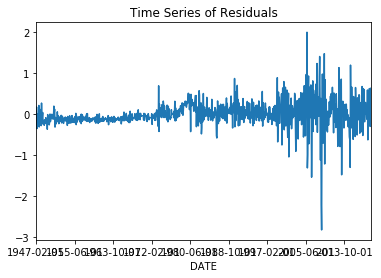

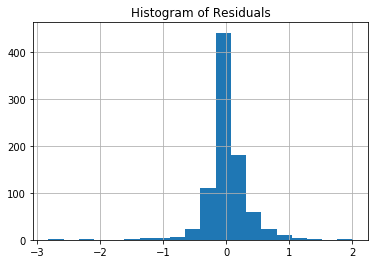

In [23]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')